# Exploring Data

## Imports

In [9]:
from importlib.metadata import version
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/MaxPrestige/CA_Weather_Fire_Dataset_Cleaned/Data/CA_Weather_Fire_Dataset_Cleaned.csv")

c:\Users\brianperez\AppData\Local\anaconda3\envs\WP_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df

,DAY_OF_YEAR,MONTH,YEAR,SEASON,PRECIPITATION,LAGGED_PRECIPITATION,AVG_WIND_SPEED,LAGGED_AVG_WIND_SPEED,WIND_TEMP_RATIO,MIN_TEMP,TEMP_RANGE,FIRE_START_DAY,MAX_TEMP
0,1.0,1.0,1984.0,1.0,0.0,0.0,4.70,4.700000,0.059494,51.0,28.0,0.0,79.0
1,2.0,1.0,1984.0,1.0,0.0,0.0,5.59,5.145000,0.078732,46.0,25.0,0.0,71.0
2,3.0,1.0,1984.0,1.0,0.0,0.0,5.37,5.220000,0.076714,47.0,23.0,0.0,70.0
3,4.0,1.0,1984.0,1.0,0.0,0.0,4.70,5.090000,0.061842,45.0,31.0,0.0,76.0
4,5.0,1.0,1984.0,1.0,0.0,0.0,5.14,5.100000,0.069459,49.0,25.0,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,8.0,1.0,2025.0,1.0,0.0,0.0,10.51,6.485714,0.143973,53.0,20.0,0.0,73.0
14984,9.0,1.0,2025.0,1.0,0.0,0.0,4.92,6.550000,0.072353,46.0,22.0,0.0,68.0
14985,10.0,1.0,2025.0,1.0,0.0,0.0,3.58,6.327143,0.051143,46.0,24.0,0.0,70.0
14986,11.0,1.0,2025.0,1.0,0.0,0.0,NaN,6.561667,NaN,46.0,20.0,0.0,66.0


<Axes: xlabel='MAX_TEMP', ylabel='Count'>

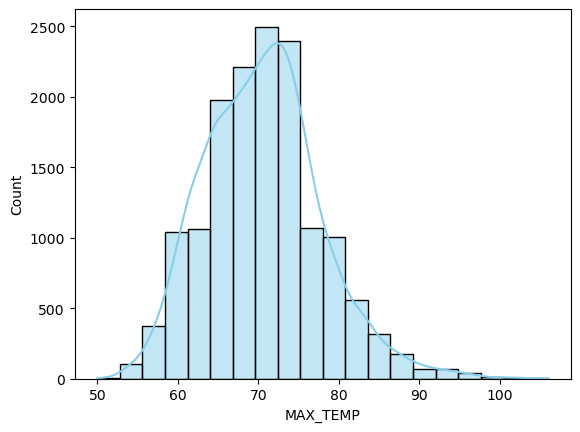

In [15]:
sns.histplot(df['MAX_TEMP'], kde=True, bins=20, color='skyblue')

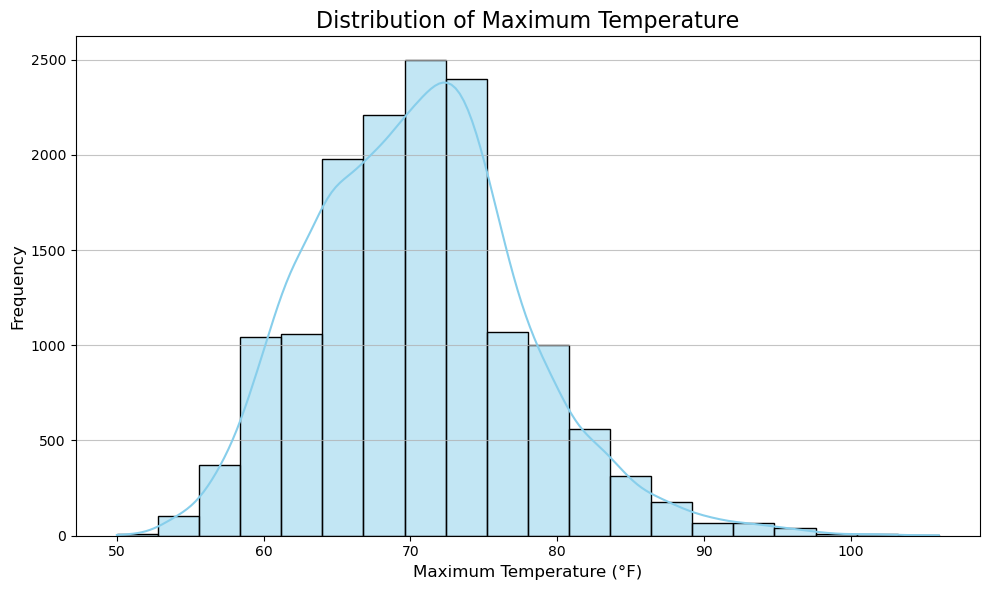

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MAX_TEMP'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Maximum Temperature', fontsize=16)
plt.xlabel('Maximum Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

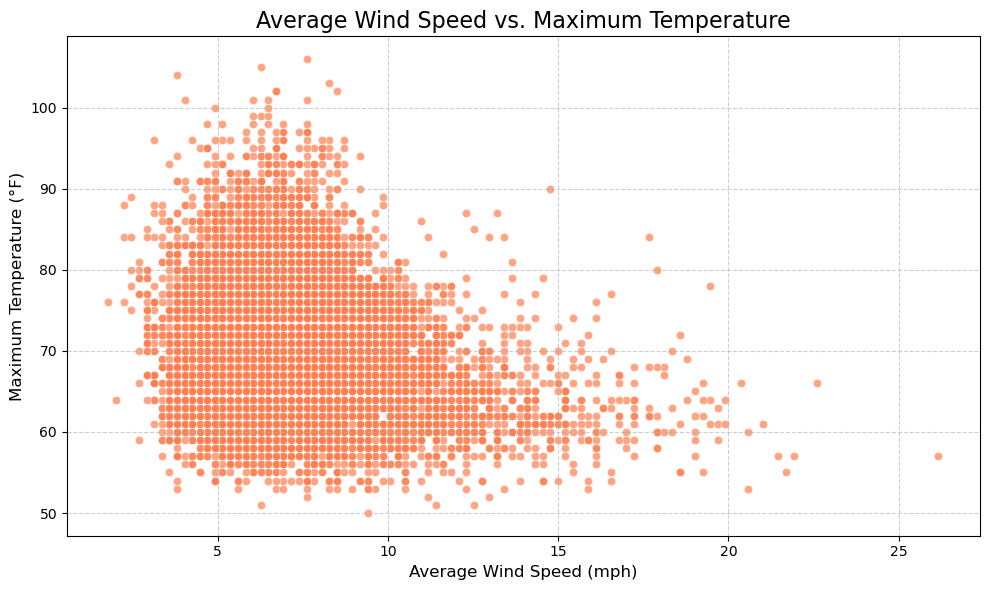

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_WIND_SPEED', y='MAX_TEMP', data=df, alpha=0.7, color='coral')
plt.title('Average Wind Speed vs. Maximum Temperature', fontsize=16)
plt.xlabel('Average Wind Speed (mph)', fontsize=12)
plt.ylabel('Maximum Temperature (°F)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

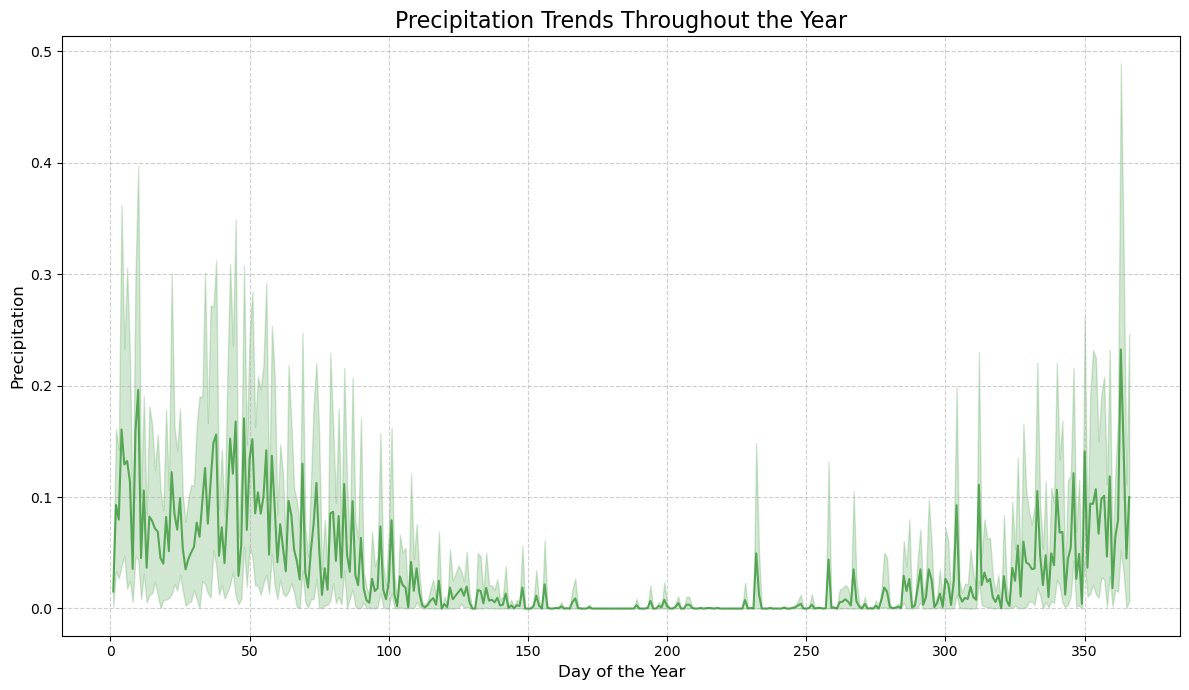

In [14]:
df_sorted = df.sort_values(by='DAY_OF_YEAR')
plt.figure(figsize=(12, 7))
# Using a slightly transparent line to show density if there are multiple years
sns.lineplot(x='DAY_OF_YEAR', y='PRECIPITATION', data=df_sorted, color='forestgreen', alpha=0.7)
plt.title('Precipitation Trends Throughout the Year', fontsize=16)
plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Precipitation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<Axes: xlabel='YEAR', ylabel='MAX_TEMP'>

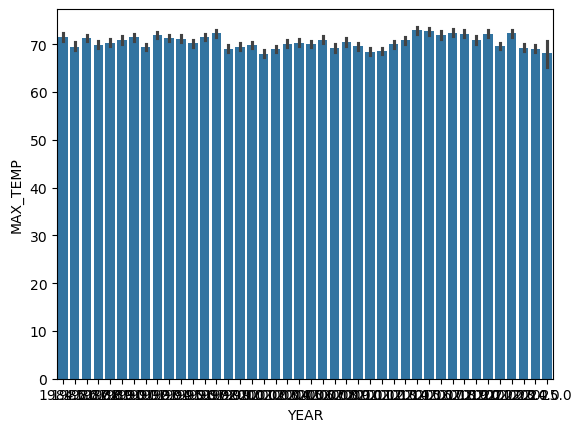

In [11]:
sns.barplot(data=df, x="YEAR", y="MAX_TEMP")

In [4]:
# WEATHER_PATH_ORIGINAL = Path("../Data/CA_Weather_Fire_Dataset_1984-2025.csv")     # Set the data source path
WEATHER_DATA_CLEAN="CA_Weather_Fire_Dataset_Cleaned.csv"
WEATHER_DATA_CLEAN_PATH = Path("../Data") / WEATHER_DATA_CLEAN

In [11]:
DATA_SPLITS_DIR = Path("../Data/DataSplits")

In [12]:
TRAIN_DATA_PATH = DATA_SPLITS_DIR / "train.csv"
TEST_DATA_PATH = DATA_SPLITS_DIR / "test.csv"
VALIDATION_DATA_PATH = DATA_SPLITS_DIR / "val.csv"


In [13]:
os.makedirs(DATA_SPLITS_DIR, exist_ok=True)

In [5]:
shuffled_data = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
num_samples = len(shuffled_data)
train_size=.80
test_size=.10
val_size=.10

train_index = int(num_samples * train_size)
test_end_index = int(num_samples * (train_size + test_size))

In [ ]:
train_data_frame = shuffled_data.iloc[:train_index]
test_data_frame = shuffled_data.iloc[train_index:test_end_index]
val_data_frame = shuffled_data.iloc[test_end_index:]